# План семинара
- Функционалы и метрики
- Кросс-валидация
- Переобучение и регуляризация
- Гиперпараметры и их оптимизация

# Функционалы и метрики

Quick recap

Функционал (или функция потерь == loss function)  - это функция, позволяющая обучить модель (то есть то, что мы стараемся оптимизировать, подбирая параметры модели - в случае линейной регрессии параметры - это веса)

Метрика - это оценка качества модели, которую можно использовать к любым моделям (позволяет ответить на вопрос, насколько точно модель может предсказывать целевую переменную)

Пример: Чтобы обучить линейную регрессию мы можем минизировать функционал MSE

Если мы имеем n наблюдений и k признаков

$\Sigma_{i=0}^{n}(\hat y_{i} - y_{i})^{2} \rightarrow min_{w}$

где $\hat y_{i} = \Sigma_{i=0}^{k}w_{k}X_{ik}$

А как метрику можем использовать RMSE

$RMSE = \sqrt{\Sigma_{i=0}^{n}(\hat y_{i} - y_{i})^{2}}$

Фундаментальное различие функционала и метрик в том, что метрика должна отражать нашу бизнес-задачу или научный вопрос, а функционал должен быть подобран так, чтобы он лучше лучше всего помогал достичь цель (позволял достичь наилучшных показателей метрики или метрик)

Аналогия из обучения в вышке: Чтобы сдать матан, мы можем учить производные различных функций, то есть тогда наш функционал - это количество производных, которые мы знаем. А метрикой того, что мы сдали матан будет являться оценка, полученная в конце курса.

Оценка в курсе - это понятная метрика, которую нам дал мир. А является ли зубрежка производных лучшим функционалом для достижения поставленной цели решать уже вам, как исследователям

И еще, хотя функционал и метрики - это разные по смыслу и использованию инструменты, они могут быть считаться одинаково (то есть к примеру обучать линейную регрессию можно обучать с помощью функционала MSE, и проверять качество тоже можно с помощью MSE)

In [2]:
# pip install scikit-learn

import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import load_diabetes 

In [3]:
np.random.seed(42)

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
a, b = 2, 3
a, b

(2, 3)

In [49]:
X, y = load_diabetes(return_X_y=True,as_frame=True, scaled=True)


In [51]:
X.sample(2, random_state = 42)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
287,0.045341,-0.044642,-0.006206,-0.015999,0.125019,0.125198,0.019187,0.034309,0.032432,-0.005220
211,0.092564,-0.044642,0.036907,0.021872,-0.024960,-0.016658,0.000779,-0.039493,-0.022517,-0.021788


In [53]:
y.sample(2, random_state = 42)

287    219.0
211     70.0
Name: target, dtype: float64

In [55]:
round(X.describe(), 3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000
mean,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000
std,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048
min,-0.107,-0.045,-0.090,-0.112,-0.127,-0.116,-0.102,-0.076,-0.126,-0.138
25%,-0.037,-0.045,-0.034,-0.037,-0.034,-0.030,-0.035,-0.039,-0.033,-0.033
50%,0.005,-0.045,-0.007,-0.006,-0.004,-0.004,-0.007,-0.003,-0.002,-0.001
75%,0.038,0.051,0.031,0.036,0.028,0.030,0.029,0.034,0.032,0.028
max,0.111,0.051,0.171,0.132,0.154,0.199,0.181,0.185,0.134,0.136


In [57]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [59]:
# Разобьем данные на обучающую и тестовую выборки

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


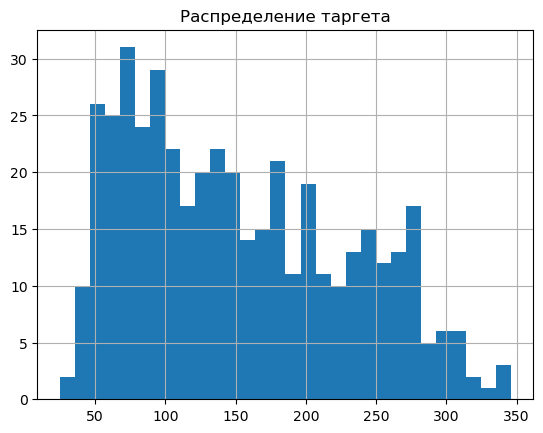

In [61]:
from matplotlib import pylab as plt
%pylab inline

plt.hist(y, bins = 30)
plt.title('Распределение таргета')
plt.grid()

Как было рассказано на лекции, линейную регрессию можно обучать с помощью разного функционала (не только MSE, который мы разбирали на прошлом семинаре) и оценивать с помощью разных метрик - закодим это 

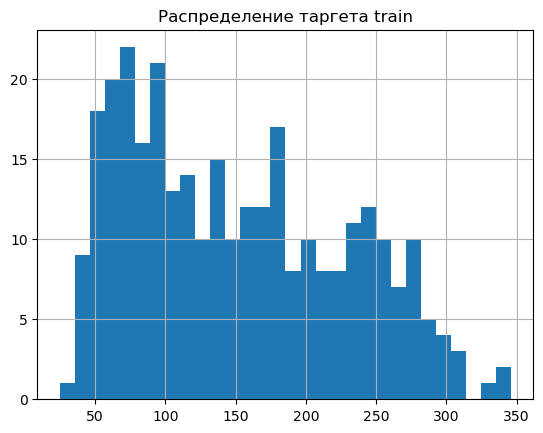

In [64]:
plt.hist(y_train, bins = 30)
plt.title('Распределение таргета train')
plt.grid()

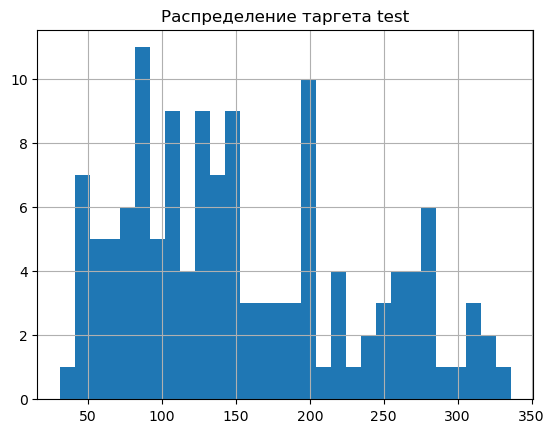

In [65]:
plt.hist(y_test, bins = 30)
plt.title('Распределение таргета test')
plt.grid()

In [66]:
len(y_test)/len(y), len(y_train)/len(y)

(0.3009049773755656, 0.6990950226244343)

In [67]:
X_test_mini = X_test.iloc[:2]

In [68]:
X_test_mini

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
331,0.081666,0.05068,-0.025607,-0.036656,-0.070367,-0.046407,-0.039719,-0.002592,-0.041176,-0.005220
341,0.030811,0.05068,0.059541,0.056301,-0.022208,0.001191,-0.032356,-0.002592,-0.024795,-0.017646


In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr_mse = SGDRegressor(max_iter=50000) # MSE
lr_mae = SGDRegressor(loss='epsilon_insensitive', epsilon=0, max_iter=50000) # MAE

lr_mse.fit(X_train, y_train)
lr_mae.fit(X_train, y_train)

y_pred_mse = lr_mse.predict(X_test)
y_pred_mae = lr_mae.predict(X_test)

print(f'''MSE loss: 
mae={mean_absolute_error(y_test, y_pred_mse)}
mse={mean_squared_error(y_test, y_pred_mse)}
R2={r2_score(y_test, y_pred_mse)}
''')

print(f'''MAE loss: 
mae={mean_absolute_error(y_test, y_pred_mae)}
mse={mean_squared_error(y_test, y_pred_mae)}
R2={r2_score(y_test, y_pred_mae)}
''')

print(f'''MSE loss TRAIN: 
mae={mean_absolute_error(y_train, lr_mse.predict(X_train))}
mse={mean_squared_error(y_train, lr_mse.predict(X_train))}
R2={r2_score(y_train, lr_mse.predict(X_train))}
''')



MSE loss: 
mae=46.82736610287794
mse=3313.97172625828
R2=0.44970349504223306

MAE loss: 
mae=63.79595858052617
mse=6562.543500459399
R2=-0.08973312093208263

MSE loss TRAIN: 
mae=43.54956774393586
mse=2835.1940907902635
R2=0.5182050642957537



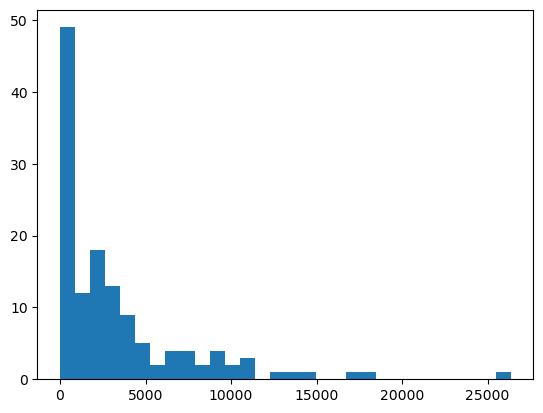

In [70]:
plt.hist((y_test-y_pred_mse)**2, bins=30)
plt.show()

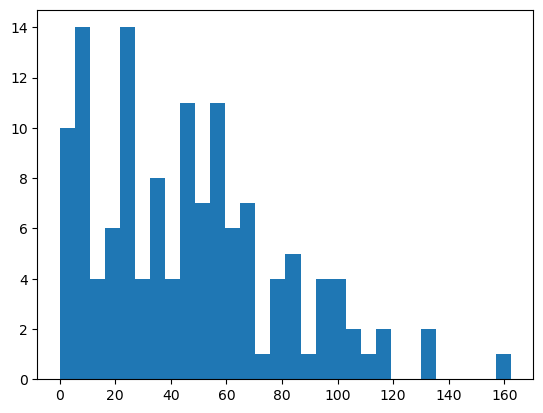

In [71]:
plt.hist(np.abs((y_test-y_pred_mse)), bins=30)
plt.show()

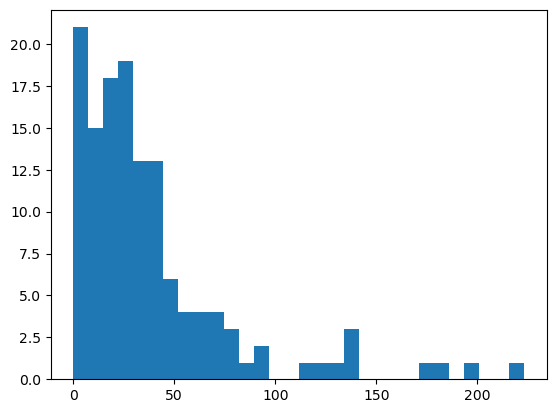

In [72]:
plt.hist(np.abs((y_test-y_pred_mse)/y_test * 100), bins=30)
plt.show()

In [73]:
X_test.iloc[(np.abs((y_test-y_pred_mse)/y_test)).argmax()]

age    0.001751
sex   -0.044642
bmi   -0.008362
bp    -0.064199
s1    -0.038720
s2    -0.024487
s3     0.004460
s4    -0.039493
s5    -0.064685
s6    -0.054925
Name: 297, dtype: float64

Как мы говорили раньше, метрика должна отражать реальную цель из мира, поэтому нередко возникает потребность в написании своих собственных метрик, которые лучше описывают вашу конретную реальность. В задачах, связанных с медициной (как у нас сейчас), довольно высокая цена ошибки (у человека есть диабет, а мы его не нашли). Поэтому для того, чтобы ответить на вопрос, можно ли модель использовать в жизни, имеет смысл использовать метрику максимальной ошибки модели

$max error = max(|\hat y_{i} - y_{i}|)$

In [76]:
a = [120, 130, 156, 183, 194, 201]

In [77]:
np.sum(a)/6

164.0

In [78]:
def max_error(y_true, y_pred):
    max_erorr = np.abs(y_true - y_pred).max()
    return max_erorr

def quantile_error(y_true, y_pred, q=0.95):
    q_error = np.quantile(np.abs(y_true -  y_pred), q)
    return q_error

# Оценим максимальную ошибку в обоих случаях

print(f'MSE Loss: {max_error(y_test, y_pred_mse)}')
print(f'MAE Loss: {max_error(y_test, y_pred_mae)}')

MSE Loss: 162.35320097394782
MAE Loss: 204.77190424165067


BTW, в sklearn есть большое количество уже реализованных метрик - можете посмотреть их список и варианты применения здесь

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

#  Кросс-валидация

Когда выбран функционал и метрика, можно задаться вопросом: а насколько я могу доверять полученным результатам (значениям метрики), не являются ли они случайности или совпадением ? Кросс-валидация - это инструмент для ответа на этот вопрос.

In [82]:
from sklearn.model_selection import cross_validate, cross_val_score

здесь можно посмотреть какие параметры требуются для этой функции
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

In [84]:
# проверим на кросс-валидации значения ошибок MSE, MAE, R2 
# для линейной регрессии, обученной с помощью функционала MSE

num_splits=5

cv_res = cross_validate(lr_mse,
                     X,
                     y,
                     scoring='neg_mean_squared_error', # метрика, которую нужно оценить
                     cv=num_splits, # количество разбиений или класс-сплиттер
                     verbose = 4
                    )

print(f"test mse errors are {cv_res['test_score']}")
print(f"mean test mse = {cv_res['test_score'].mean()}")

[CV] END ..................................., score=-3005.231 total time=   0.1s
[CV] END ..................................., score=-3028.531 total time=   0.3s
[CV] END ..................................., score=-3160.230 total time=   0.2s
[CV] END ..................................., score=-2910.330 total time=   0.3s
[CV] END ..................................., score=-3033.709 total time=   0.2s
test mse errors are [-3005.23084487 -3028.53069372 -3160.23007258 -2910.32984361
 -3033.70907605]
mean test mse = -3027.606106164169


In [85]:
cv_res

{'fit_time': array([0.23909569, 0.36256051, 0.28894496, 0.35243511, 0.27626538]),
 'score_time': array([0.00200844, 0.00237656, 0.00200891, 0.00227308, 0.00212121]),
 'test_score': array([-3005.23084487, -3028.53069372, -3160.23007258, -2910.32984361,
        -3033.70907605])}

In [87]:
# Проведем кросс-валидацию сразу для нескольких метрик

cv_res2 = cross_validate(lr_mse,
                     X,
                     y,
                     scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
                     cv=num_splits
                    )
print(f"""test mse errors are {cv_res2['test_neg_mean_squared_error']} 
and  mean mse = {cv_res2['test_neg_mean_squared_error'].mean()}
""")

print(f"""test mae errors are {cv_res2['test_neg_mean_absolute_error']} 
and  mean mae = {cv_res2['test_neg_mean_absolute_error'].mean()}
""")


print(f"""test R2 are {cv_res2['test_r2']} 
and  mean R2 = {cv_res2['test_r2'].mean()}
""")


test mse errors are [-2972.97367403 -3030.364651   -3169.46826541 -2896.02952274
 -3031.17941394] 
and  mean mse = -3020.0031054237434

test mae errors are [-44.92305832 -44.92543003 -48.13617648 -42.7292507  -43.88960377] 
and  mean mae = -44.920703859434056

test R2 are [0.389942   0.5223585  0.49358066 0.44798293 0.53155383] 
and  mean R2 = 0.4770835843706642



In [89]:
pd.DataFrame(cv_res2)

,fit_time,score_time,test_neg_mean_squared_error,test_neg_mean_absolute_error,test_r2
0,0.276809,0.003609,-2972.973674,-44.923058,0.389942
1,0.328614,0.003025,-3030.364651,-44.925430,0.522358
2,0.274653,0.004007,-3169.468265,-48.136176,0.493581
3,0.298331,0.004519,-2896.029523,-42.729251,0.447983
4,0.305912,0.003065,-3031.179414,-43.889604,0.531554


In [90]:
def max_error(y_true, y_pred):
    max_erorr = np.abs(y_true - y_pred).max()
    return max_erorr

In [91]:
# для тех, кто хочет хочет дополнительно подумать

# кросс-валидацию можно проводить на основе своей кастомной метрики, но для этого
# из нее нужно сделать объект scorer

from sklearn.metrics import make_scorer

max_error_scorer = make_scorer(max_error, greater_is_better=False)

cv_res3 = cross_validate(lr_mse,
                     X,
                     y,
                     scoring=max_error_scorer,
                     cv=num_splits
                    )
cv_res3['test_score']

array([-136.84479587, -161.69825227, -120.54036069, -129.9607894 ,
       -135.25342634])

# Немного feature engineering

Один из самых главных источников улучшения качества прогноза модели - это информативный набор признаков. Поэтому в попытке улучшить качество нашей модели обогатим наше признаковое пространство попарныи произведениями признаков

In [96]:
import copy

cols = copy.deepcopy(X.columns)
print(cols)

for col1 in cols:
    for col2 in cols:
        col_name = col1 + '_x_' + col2
        if col_name not in X.columns:
            X[col_name] = X[col1]*X[col2]
X

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,...,s6_x_age,s6_x_sex,s6_x_bmi,s6_x_bp,s6_x_s1,s6_x_s2,s6_x_s3,s6_x_s4,s6_x_s5,s6_x_s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,...,-0.000672,-0.000894,-0.001089,-0.000386,0.000780,0.000614,0.000766,0.000046,-0.000351,0.000311
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,...,0.000174,0.004116,0.004746,0.002428,0.000779,0.001767,-0.006861,0.003641,0.006300,0.008502
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,...,-0.002212,-0.001314,-0.001153,0.000147,0.001182,0.000887,0.000839,0.000067,-0.000074,0.000672
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,...,0.000834,0.000418,0.000109,0.000343,-0.000114,-0.000234,0.000337,-0.000321,-0.000212,0.000088
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,...,-0.000251,0.002082,0.001697,-0.001020,-0.000184,-0.000727,-0.000380,0.000121,0.001492,0.002175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,...,0.000301,0.000365,0.000142,0.000431,-0.000041,-0.000018,-0.000207,-0.000019,0.000225,0.000052
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,...,-0.000245,0.002255,-0.000708,-0.003009,0.002195,0.003522,-0.001276,0.001526,-0.000806,0.001979
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,...,0.000646,0.000785,-0.000246,0.000268,-0.000578,-0.000214,-0.000387,-0.000172,-0.000726,0.000240
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,...,0.001179,0.001158,-0.001013,-0.000032,-0.000423,-0.000396,0.000744,-0.000689,-0.001155,0.000672


# Переобучение и регуляризация

Переобучение - ситуация, когда модель хорошо выучила обучающую выборку, но при этом показывает гораздо более низкое качество точности на тестовых данных. Это можно интерпретровать как модель стала слишком специфичной и потеряла обобщающую способность

В случае линеной регрессии, одним из симптомов переобучения являются высокие значения весов. С этим борются регуляризацией.

Регуляризация Lasso или L1-регуляризация:

$Q_{lasso}(w) = Q(w) + \alpha \Sigma_{j=0}^{k}|w_{k}|$

Регуляризация Ridge или L2-регуляризация:

$Q_{ridge}(w) = Q(w) + \alpha \Sigma_{j=0}^{k}w_{k}^{2}$


Как было рассказано в лекции, несмотря на то, что оба вида регуляризации ведут к занижению значений весов, отличие регуляризации Lasso заключается в том, что она может привести часть весов к 0 (что эквивалетно безинформативности  соответствующего признака), в случае Ridge регрессии веса могут быть сколько угодно близки к 0, но никогда не равны.

Объяснение в лекции :)


In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [100]:
lr_mse.fit(X_train, y_train)

pred = lr_mse.predict(X_test)

mean_squared_error(y_test, pred)

2584.758221042186

In [101]:
# альфа - это гиперпараметр, посмотрим как зависят значения весов от него

from sklearn.linear_model import Lasso

for a in np.arange(0, 1.1, 0.25):
    if a == 0:
        a += 0.00000001
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)

    y_pred_tr = lasso.predict(X_train)
    y_pred2 = lasso.predict(X_test)

    print('alpha={}'.format(a))
    print('Train MSE:', mean_squared_error(y_train, y_pred_tr))
    print('Test MSE:', mean_squared_error(y_test, y_pred2))
    print(lasso.coef_,'\n')

alpha=1e-08
Train MSE: 2521.3973735764434
Test MSE: 2729.978565378415
[-1.21715421e+01  6.51306371e+01  4.67150955e+02  3.61681785e+02
 -2.06695791e+02  1.25896613e+02 -2.96379411e+02 -6.33923086e+01
  6.24490685e+02  2.47469677e+01  1.99213785e+03  4.13313379e+03
  2.42423002e+02  7.32103428e+02 -6.94206463e+03  1.10683164e+03
  6.75752975e+03  5.01996933e+03  9.93372163e+02  1.16087012e+03
  6.71075448e+00 -4.80829318e+04  2.71436520e+03  9.09282316e+02
  1.98012454e+03 -2.94700745e+03  3.65803961e+02 -1.10966272e+03
  4.95855006e+02 -1.63544315e+02 -1.84983467e+02  3.47406749e+02
  1.24402240e+03  1.57498872e+03 -9.01953977e+03  2.49350624e+03
  3.55907860e+03 -1.24775879e+03  1.55113460e+03  1.78991865e+03
 -1.89825726e+02 -3.92887435e+02  7.15111313e+02  1.08000165e+03
  7.84510581e+03 -8.31304050e+03 -2.86847480e+03 -9.49163293e+02
 -6.35771977e+03 -1.15068167e+03 -4.28798092e+03  5.60053480e+03
 -3.10556919e+03  1.26776422e+04  4.39545964e+02 -7.50844517e+03
 -8.37629973e+03  3.

In [102]:
X.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       ...
       's6_x_age', 's6_x_sex', 's6_x_bmi', 's6_x_bp', 's6_x_s1', 's6_x_s2',
       's6_x_s3', 's6_x_s4', 's6_x_s5', 's6_x_s6'],
      dtype='object', length=110)

In [104]:
lasso

Lasso()

In [105]:
pd.DataFrame(zip(X.columns, lasso.coef_))

,0,1
0,age,0.000000
1,sex,-0.000000
2,bmi,386.526311
3,bp,42.411873
4,s1,0.000000
...,...,...
105,s6_x_s2,0.000000
106,s6_x_s3,-0.000000
107,s6_x_s4,0.000000
108,s6_x_s5,0.000000


In [106]:
# альфа - это гиперпараметр, посмотрим как зависят значения весов от него

from sklearn.linear_model import Ridge

for a in np.arange(0, 1.1, 0.25):
    if a == 0:
        a += 0.00000001
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)

    y_pred_tr = ridge.predict(X_train)
    y_pred2 = ridge.predict(X_test)

    print('alpha={}'.format(a))
    print('Train MSE:', mean_squared_error(y_train, y_pred_tr))
    print('Test MSE:', mean_squared_error(y_test, y_pred2))
    print(ridge.coef_,'\n')

alpha=1e-08
Train MSE: 2478.659561191678
Test MSE: 2911.387880433009
[ 8.14134175e+00 -2.39792722e+02  4.86367034e+02  3.72575049e+02
  6.44153911e+03 -5.66033862e+03 -2.83174569e+03 -1.70721439e+02
 -1.51829364e+03  1.26303735e+01  2.11768708e+03  1.61439439e+03
 -2.71582486e+02  3.54320329e+02 -3.32013088e+03 -2.03143004e+02
  4.09669121e+03  4.08520255e+03  6.67819212e+02  3.08808306e+02
  1.61439439e+03 -1.44798344e+00  1.45904865e+03  2.09263765e+02
  5.21405338e+03 -4.04634879e+03 -2.78475574e+03 -2.66655117e+03
 -8.55097219e+02  5.36850737e+01 -2.71582484e+02  1.45904865e+03
  1.05887228e+03  1.16287792e+03  8.03277925e+02 -1.38030883e+03
 -1.32833949e+03 -1.50128899e+03 -2.83069251e+02  1.53617718e+02
  3.54320327e+02  2.09263764e+02  1.16287792e+03  1.02881415e+03
  1.04253738e+04 -7.78812004e+03 -3.74315541e+03  1.70712290e+02
 -4.80970747e+03 -1.46841782e+03 -3.32013088e+03  5.21405338e+03
  8.03277928e+02  1.04253738e+04  1.75310333e+05 -1.40014128e+05
 -8.06455653e+04 -1.9

А какой коэффициент альфа лучший ? И нужна ли здесь регуляризация ?

Чтобы ответить на этот вопрос мы можем с помощью кросс-валидации перебрать различные значения альфы и выбрать лучшее значение. Этот процесс называется оптимизацией гиперпараметров. Альфа является гиперпараметром, потому что задача оптимизации функционала не позволяет найти ее оптимальное значение (в отличие от весов регрессии).

ниже мы плдбираем альфу специальной библиотекой

In [108]:
from sklearn.linear_model import LassoCV

n_alphas = 200
alphas = np.linspace(1e-10, 5, n_alphas)

lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_cv.fit(X, y)

print(f'Optimal alpha value is {lasso_cv.alpha_}')


Optimal alpha value is 0.025125628240201005


In [2]:
# Более общий способ использования кросс-валидации для поиска лучшего набора гиперпараметров


from sklearn.model_selection import GridSearchCV

params = {'alpha':alphas,}

#print(params)
cv = GridSearchCV(lasso,
                  params,
                  scoring='r2',
                  cv=num_splits
                 )
cv.fit(X, y)

print(cv.best_params_)

NameError: name 'alphas' is not defined

In [151]:
pd.DataFrame(cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.061087,0.011530,0.005424,0.000354,0.0,{'alpha': 1e-10},0.374011,0.532243,0.447966,0.088060,0.476719,0.383800,0.156425,32
1,0.011559,0.000529,0.005973,0.000582,0.025126,{'alpha': 0.025125628240201005},0.420838,0.520400,0.492165,0.432448,0.544555,0.482081,0.048347,1
2,0.010030,0.000422,0.005968,0.000908,0.050251,{'alpha': 0.05025125638040201},0.414919,0.519239,0.491511,0.441288,0.543241,0.482040,0.047718,2
3,0.010795,0.001038,0.005360,0.001154,0.075377,{'alpha': 0.07537688452060301},0.408844,0.517860,0.490503,0.447690,0.541514,0.481282,0.047805,3
4,0.011273,0.000566,0.005944,0.000999,0.100503,{'alpha': 0.10050251266080401},0.401952,0.515022,0.488770,0.452689,0.538919,0.479470,0.048189,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.010496,0.000568,0.005757,0.000779,4.899497,{'alpha': 4.899497487439196},-0.098448,-0.027867,-0.000533,-0.008342,-0.002340,-0.027506,0.036772,93
196,0.011784,0.002049,0.005804,0.000379,4.924623,{'alpha': 4.924623115579397},-0.098448,-0.027867,-0.000533,-0.008342,-0.002340,-0.027506,0.036772,93
197,0.010307,0.000364,0.006324,0.000464,4.949749,{'alpha': 4.9497487437195975},-0.098448,-0.027867,-0.000533,-0.008342,-0.002340,-0.027506,0.036772,93
198,0.010120,0.001128,0.006010,0.000500,4.974874,{'alpha': 4.974874371859799},-0.098448,-0.027867,-0.000533,-0.008342,-0.002340,-0.027506,0.036772,93


Больше про то, как задавать поле поиска и какие еще есть методы оптимизации гиперпараметров можете прочитать здесь

https://scikit-learn.org/stable/modules/grid_search.html